In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ME\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df=pd.read_csv("./CSVFiles/legend.csv")

df['emotion']=df['emotion'].apply(str.lower)

df=df.drop(['user.id'],axis=1)
df=df.drop_duplicates(subset=['image'])

In [3]:
df.head()

,image,emotion
0,facial-expressions_2868585k.jpg,surprise
1,facial-expressions_2868584k.jpg,disgust
2,facial-expressions_2868582k.jpg,fear
3,Aaron_Eckhart_0001.jpg,neutral
4,Aaron_Guiel_0001.jpg,happiness


In [4]:
augument=ImageDataGenerator(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.01,
                            zoom_range=[0.9, 1.25],
                            horizontal_flip=True,
                            vertical_flip=False,
                            fill_mode='nearest',
                            data_format='channels_last',
                            rescale=1/255,
                            brightness_range=[0.5, 1.5],
                            validation_split=0.1
                           )

In [5]:
train_gen=augument.flow_from_dataframe(dataframe=df,
                             directory='./images',
                             x_col='image',
                             y_col='emotion',
                             target_size=(128,128),
                             color_mode='grayscale',
                             batch_size=64,
                             shuffle=True,
                             subset='training'
                            )

Found 12312 images belonging to 8 classes.


In [6]:
test_gen=augument.flow_from_dataframe(dataframe=df,
                             directory='./images',
                             x_col='image',
                             y_col='emotion',
                             target_size=(128,128),
                             color_mode='grayscale',
                             batch_size=64,
                             shuffle=False,
                             subset='validation')

Found 1369 images belonging to 8 classes.


In [7]:
train_gen.class_indices

{'surprise': 0,
 'disgust': 1,
 'fear': 2,
 'neutral': 3,
 'happiness': 4,
 'sadness': 5,
 'anger': 6,
 'contempt': 7}

In [8]:
test_gen.class_indices

{'surprise': 0,
 'disgust': 1,
 'fear': 2,
 'neutral': 3,
 'happiness': 4,
 'sadness': 5,
 'anger': 6,
 'contempt': 7}

In [9]:
#acc values
acc=[]

In [10]:
#optimizer
adam=keras.optimizers.Adam(lr=0.001)

In [9]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(128,128,1)))
model.add(tf.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(padding='same'))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(padding='same'))

model.add(keras.layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(padding='same'))

model.add(keras.layers.Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(padding='same'))

model.add(keras.layers.Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(padding='same'))

model.add(keras.layers.Conv2D(1024,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(padding='same'))

model.add(keras.layers.GlobalAvgPool2D())
model.add(tf.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(units=512,activation='relu'))
model.add(tf.layers.BatchNormalization())
#model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=8,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
#model.summary()

In [13]:
ckpoint=keras.callbacks.ModelCheckpoint(filepath='./model/facial_model_overfit.hdf5',
                                        monitor='acc',
                                        verbose=0,
                                        save_best_only=True,
                                        save_weights_only=False,
                                        mode='max',
                                        period=1)

Epoch 1/100
193/193 [==============================] - 37s 194ms/step - loss: 0.7452 - acc: 0.76720s - loss: 0.7475 - acc: 0.7
Epoch 2/100
193/193 [==============================] - 35s 180ms/step - loss: 0.4765 - acc: 0.8404
Epoch 3/100
193/193 [==============================] - 35s 180ms/step - loss: 0.4190 - acc: 0.8549
Epoch 4/100
193/193 [==============================] - 35s 180ms/step - loss: 0.3916 - acc: 0.8630
Epoch 5/100
193/193 [==============================] - 35s 180ms/step - loss: 0.3601 - acc: 0.87324s - loss: 0.3577 - acc: 0.87 - ETA: 4s - lo
Epoch 6/100
193/193 [==============================] - 35s 180ms/step - loss: 0.3368 - acc: 0.8755
Epoch 7/100
193/193 [==============================] - 35s 180ms/step - loss: 0.3389 - acc: 0.8800
Epoch 8/100
193/193 [==============================] - 35s 180ms/step - loss: 0.3185 - acc: 0.8820
Epoch 9/100
193/193 [==============================] - 35s 180ms/step - loss: 0.3011 - acc: 0.8892
Epoch 10/100
193/193 [===============

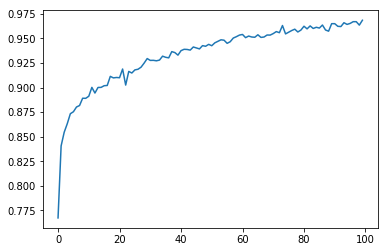

In [12]:
history=model.fit_generator(generator=train_gen,epochs=10,max_queue_size=4)#,callbacks=[ckpoint])
#ploting the acc
acc.extend(history.history['acc'])
plt.plot(acc)

In [21]:
model.evaluate_generator(generator=test_gen,max_queue_size=4)

[0.6151517676209951, 0.8692476263091545]

In [22]:
model.save("./model/facial_model_overfit.hdf5")

# Loading the saved model

In [ ]:
del(model)

In [25]:
model=keras.models.load_model("./model/facial_model_overfit.hdf5")

In [30]:
model.evaluate_generator(generator=test_gen,max_queue_size=4)

[0.6384460984016963, 0.8597516438401991]